In [19]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

extruder1 = "Unnamed: 7"

extruder2 = "Unnamed: 12"
extruder3 = "Unnamed: 17"
extruder4 = "Unnamed: 22"


extruder = extruder1
# Read the Excel file into a Pandas DataFrame
df = pd.read_excel("production.xlsx")

In [20]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Comments,Unnamed: 5,Extruder 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Extruder 2,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Extruder 3,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Extruder 4\n*TEST*,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,PRODUCTION ENTRY,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Date,Shift,Incoming Lead Sign Off:,Outgoing Lead Sign off:,Notes,NaN,Product,Hours Run,Pounds,Rate,NaN,Product,Hours Run,Pounds,Rate,NaN,Product,Hours Run,Pounds,Rate,NaN,Product,Hours Run,Pounds,Rate,NaN,NaN,Tons,Pounds,NaN,NaN,NaN,Sid,1st
1,2022-11-08 00:00:00,1st,Cody,NaN,moved 115.78 of cubes to hoop barn,NaN,DDG,12,NaN,2.5,NaN,DDG,12,NaN,2.46,NaN,DDG,12,NaN,2.1,NaN,DDG,12,NaN,2.46,114.24000,NaN,114.24,228480,NaN,NaN,NaN,NaN,NaN
2,2022-11-08 00:00:00,2nd,Sid,NaN,ran good,NaN,DDG,12,NaN,2.46,NaN,DDG,12,NaN,2.42,NaN,DDG,12,NaN,2.13,NaN,DDG,12,NaN,2.44,113.40000,NaN,113.4,226800,NaN,NaN,NaN,NaN,NaN
3,2022-11-09 00:00:00,1st,Lucas,NaN,NaN,NaN,DDG,12,43.167,2.59002,NaN,DDG,12,46,2.76,NaN,DDG,12,38,2.28,NaN,DDG,12,45.167,2.71002,124.08048,NaN,124.08048,248160.96,NaN,NaN,NaN,NaN,NaN
4,2022-11-09 00:00:00,2nd,Taylor,NaN,ran good,NaN,DDG,12,42.3,2.538,NaN,DDG,12,47.3,2.838,NaN,DDG,12,39,2.34,NaN,DDG,12,45.8,2.748,125.56800,NaN,125.568,251136,NaN,NaN,NaN,NaN,NaN


In [21]:
dates = df["Unnamed: 0"]
# Print the first five rows of the DataFrame
extruder_1_hours = df[df[extruder].notnull()]

new_df = df[df[extruder].notnull()]

new_df = new_df.drop(new_df.index[0])
new_df['datetime'] = pd.to_datetime(new_df['Unnamed: 0'], errors='coerce')

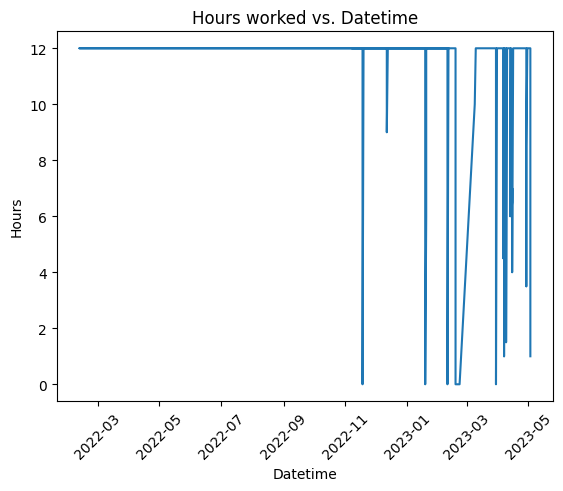

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the graph
plt.plot(new_df['datetime'], new_df[extruder])
plt.xlabel('Datetime')
plt.ylabel('Hours')
plt.title('Hours worked vs. Datetime')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [24]:
import pandas as pd

# Read the CSV file into a DataFrame
extruder_data = pd.read_csv("ex1-data.csv",)

extruder_data = extruder_data.fillna(value=0)

extruder_data = extruder_data.drop(extruder_data.index[0])
# # Remove the comma from the string

# Convert the column to string type
for column in extruder_data.columns:
    if column not in ["Date and Time", "AnomalyScore"]:
        extruder_data[column] = extruder_data[column].astype(str)
        extruder_data[column] = extruder_data[column].str.replace("<null>", "0")

        # Replace commas with an empty string
        extruder_data[column] = extruder_data[column].str.replace(",", "")

        # Convert the column back to numeric type, handling any conversion errors
        extruder_data[column] = pd.to_numeric(extruder_data[column], errors="coerce")

/tmp/ipykernel_13714/501083053.py:4: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  extruder_data = pd.read_csv("ex1-data.csv",)


In [26]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

def detect_outliers_larger_than(df, column_name, n_neighbors=3, contamination=0.1, threshold=None):

    column_data = df[column_name]
    # Reshape the data to have a single feature
    column_data_reshaped = column_data.values.reshape(-1, 1)
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)

    # Fit the model to the column data
    lof.fit(column_data_reshaped)

    # Predict the anomaly scores
    anomaly_scores = lof.negative_outlier_factor_

    # Add the anomaly scores to the DataFrame
    df['AnomalyScore'] = anomaly_scores
    threshold = np.abs(df['AnomalyScore']).quantile(threshold)

    # Select the top 5% values using boolean indexing
    top_N_percent = df[np.abs(df['AnomalyScore']) > threshold]

    return top_N_percent

In [27]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers(
    df, column_name, 
    n_neighbors=3, contamination=0.1, 
    threshold_lower=None, threshold_upper=None):

    column_data = df[column_name]

    # Reshape the data to have a single feature
    column_data_reshaped = column_data.values.reshape(-1, 1)
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)

    # Fit the model to the column data
    lof.fit(column_data_reshaped)

    # Predict the anomaly scores
    anomaly_scores = lof.negative_outlier_factor_

    # Add the anomaly scores to the DataFrame
    df['AnomalyScore'] = anomaly_scores

    # Identify the anomalies based on the condition
    if threshold_lower or threshold_upper:
        if not threshold_lower:
            threshold_lower = 0
        if not threshold_upper:
            threshold_upper = 1
        threshold_lower_value = np.abs(df['AnomalyScore']).quantile(threshold_lower)
        threshold_upper_value = np.abs(df['AnomalyScore']).quantile(threshold_upper)
        
        print(threshold_lower_value, threshold_upper_value)
        anomalies = df[(df['AnomalyScore'].abs() > threshold_lower_value) & (df['AnomalyScore'].abs() <= threshold_upper_value)]
    else:
        anomalies = df

    return anomalies

In [28]:
def plot_line_graph_with_collapsed_points(new_df, points_df, original, column_name, title):
    # Convert 'date' column to datetime type in new_df
    new_df['date'] = pd.to_datetime(new_df['datetime'], errors='coerce')
00E
    # Convert 'datetime' column to datetime type in points_df
    points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date

    # Group points_df by 'datetime' and aggregate 'column_name' using mean
    points_df_collapsed = points_df.groupby('datetime')[column_name].mean().reset_index()

    # Plot the line graph with dates data
    fig, ax1 = plt.subplots(figsize=(20,12))
    
    # Plot the line graph on the left y-axis
    ax1.plot(new_df['date'], new_df[extruder], label='Hours Worked')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Hours Worked')

    # Create a second y-axis for 'Extruder Pressure' values
    ax2 = ax1.twinx()

    # Plot the 'Extruder Pressure' values on the right y-axis
    ax2.scatter(points_df_collapsed['datetime'], points_df_collapsed[column_name], color='red',
                label=f'Mean Daily {column_name}')

    # Add a plate to label the mean extruder pressure
    # for i, row in points_df_collapsed.iterrows():
    #     ax2.annotate(round(row[column_name], 2), (row['datetime'], row[column_name]),
    #                  xytext=(5, 0), textcoords='offset points', ha='left', va='bottom')
    mean_value = original[column_name].mean()
    ax2.annotate(f'{column_name} Mean: {str(round(mean_value, 2))}', (new_df['datetime'].iloc[0],
                                                                  mean_value),
                 xytext=(-200, -100), textcoords='offset points', ha='left', va='bottom', color='darkorange')
    ax2.set_ylabel(column_name)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Show legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower left')

    # Title for the plot
    plt.title(f"{title}")

    plt.show()

100000001.00218278 400000000.9996362


/tmp/ipykernel_13714/2900335519.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date
/tmp/ipykernel_13714/2900335519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date


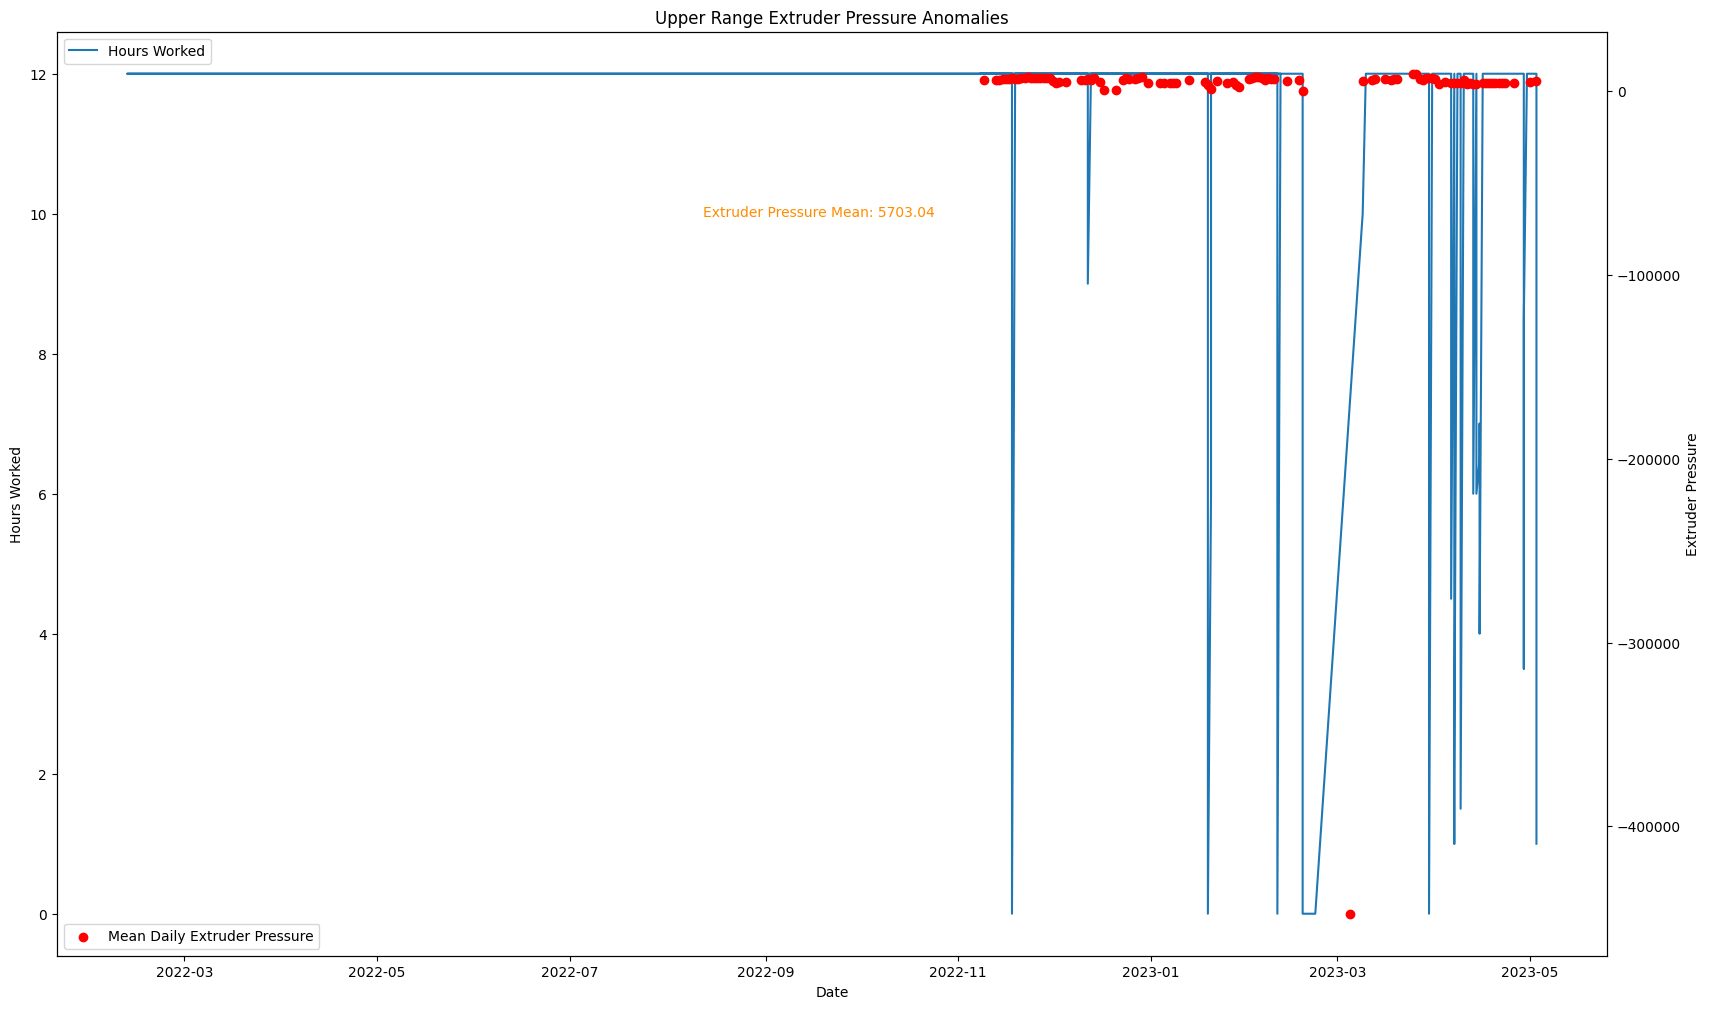

/tmp/ipykernel_13714/2900335519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date


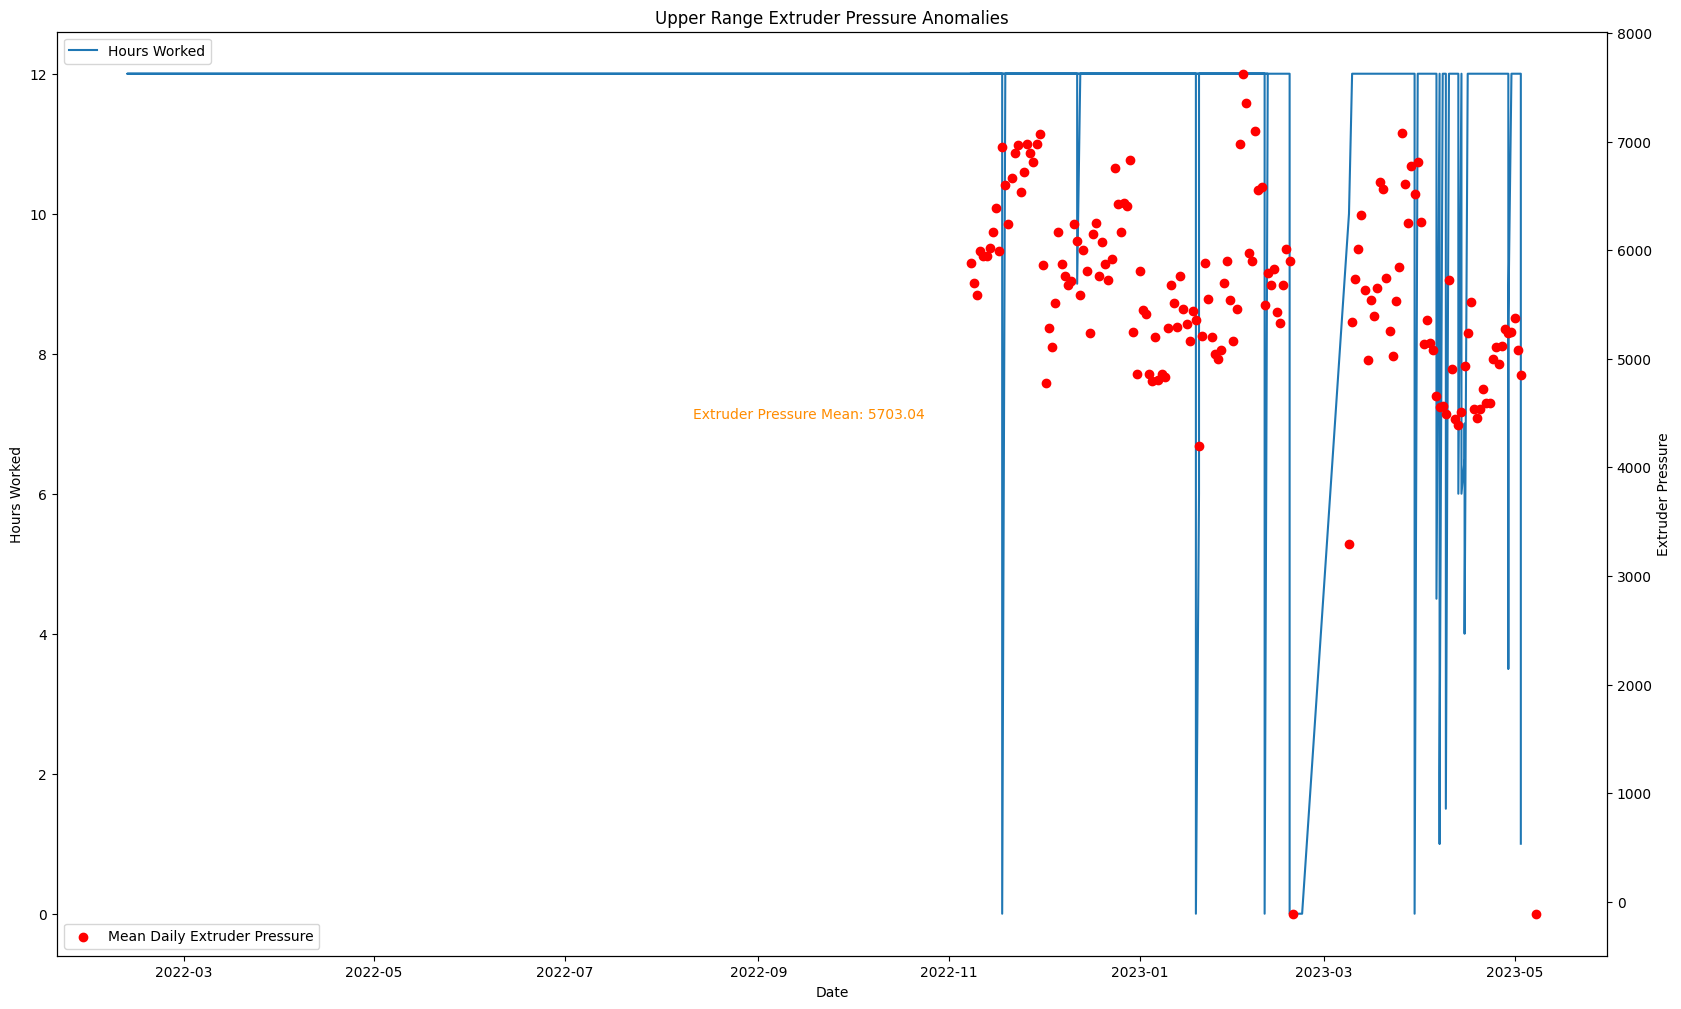

In [29]:
column_name = "Extruder Pressure"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.995)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

1.0 1.0


/tmp/ipykernel_13714/2900335519.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date
/tmp/ipykernel_13714/2900335519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_df['datetime'] = pd.to_datetime(points_df['Date and Time'], errors='coerce').dt.date


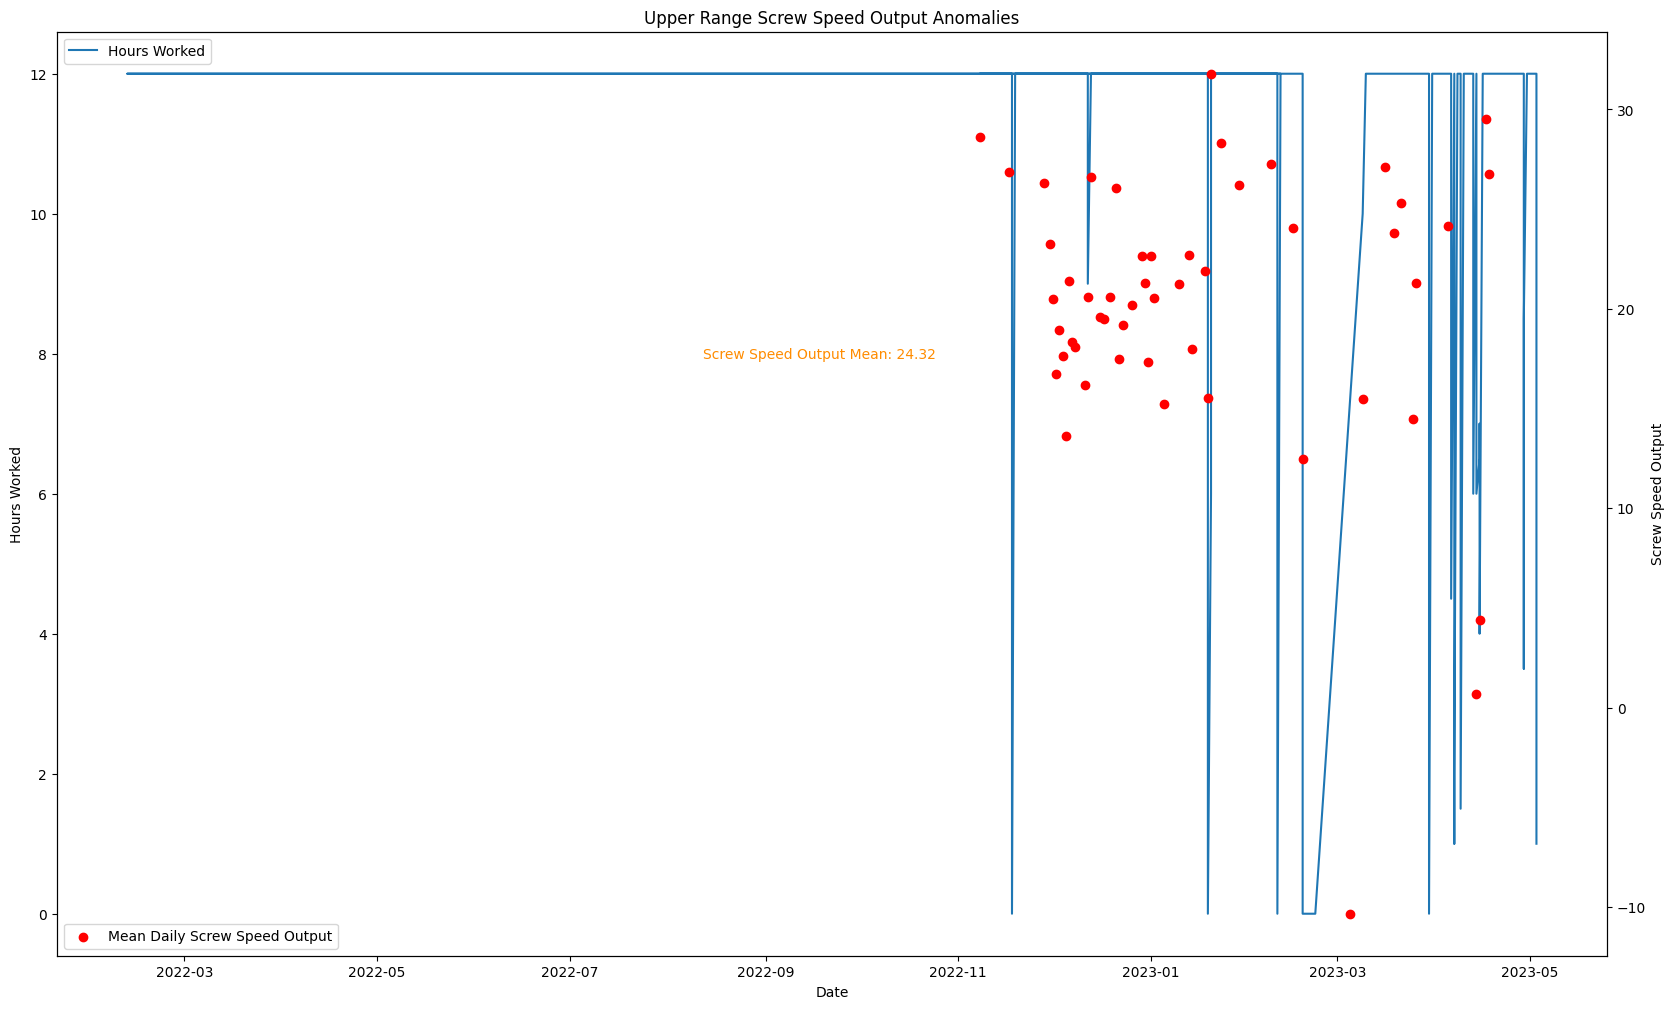

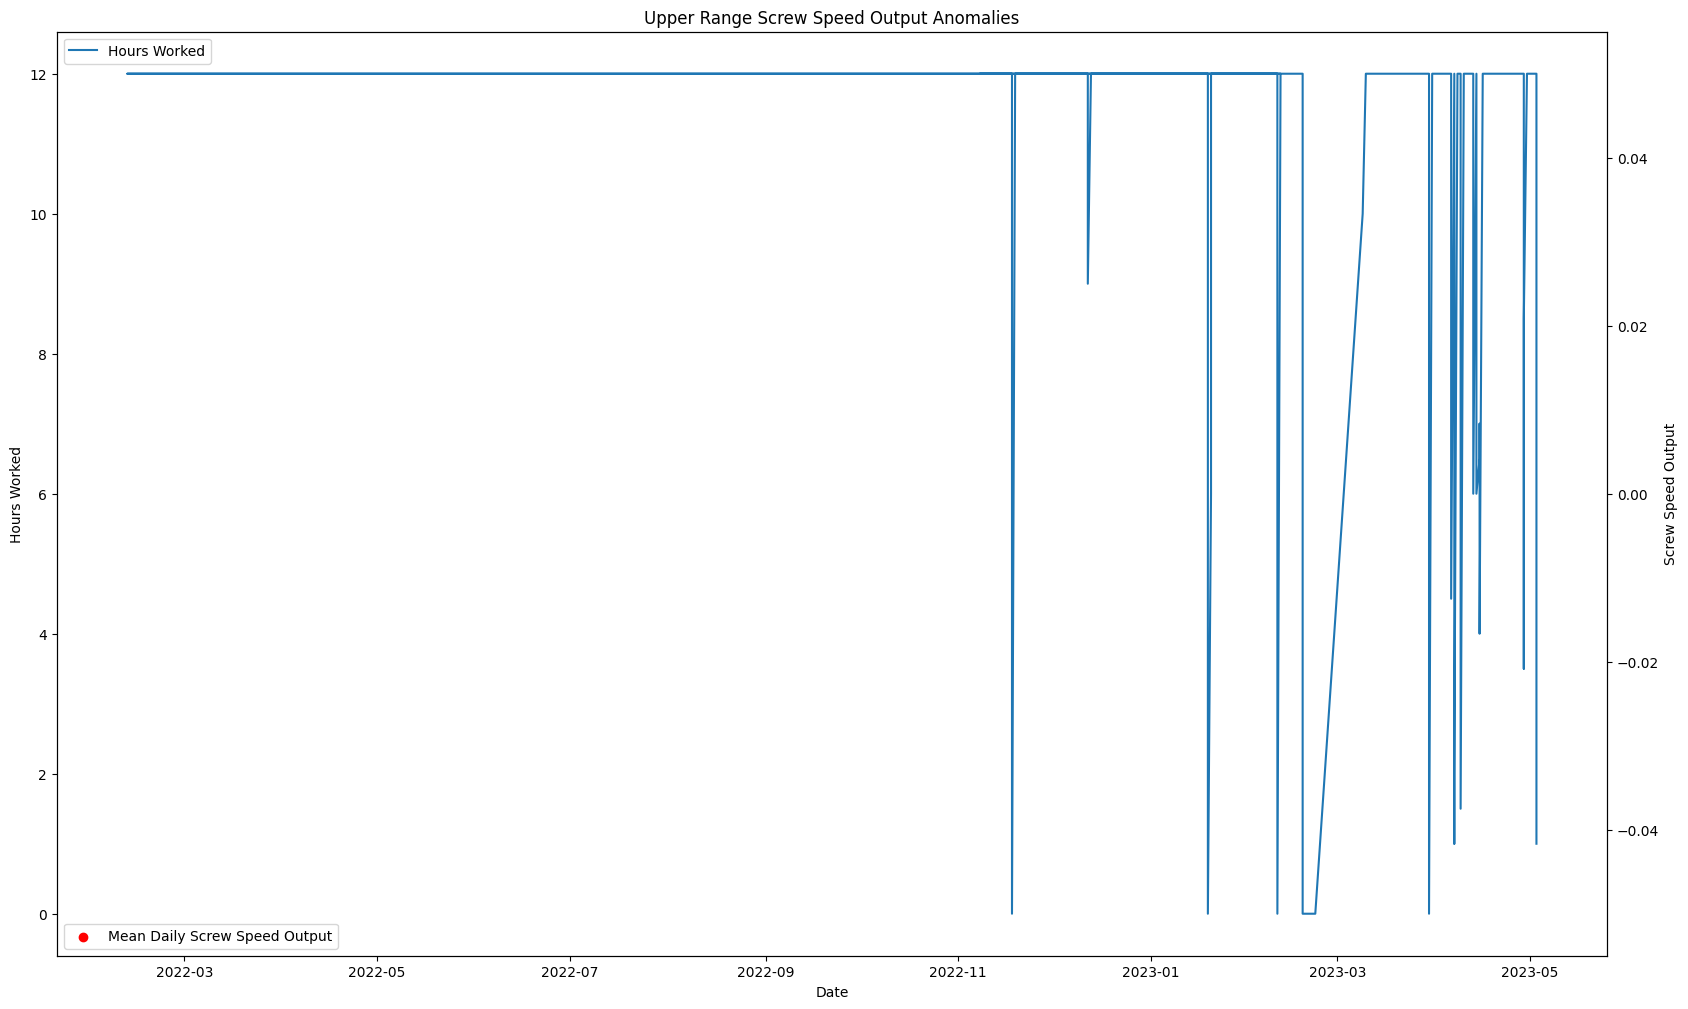

In [30]:
column_name = "Screw Speed Output"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Screw Speed"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Extruder Die Temp"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Extruder Thrust"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Feed Screw Current (Amps)"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Discharge Conveyor Current (Amps)"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")

In [ ]:
column_name = "Discharge Conveyor Speed (%)"
larger_than_anomalies = detect_outliers_larger_than(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold=0.99)

anomalies = detect_outliers(extruder_data, column_name, n_neighbors=3, contamination=0.1,
                            threshold_lower=.95, threshold_upper=.99)
plot_line_graph_with_collapsed_points(new_df, larger_than_anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")
plot_line_graph_with_collapsed_points(new_df, anomalies, extruder_data, column_name, f"Upper Range {column_name} Anomalies")